In [11]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from sklearn.cluster import MeanShift
# Import CMasher to register colormaps
#import cmasher as cmr
import geopandas as gpd
import cftime

In [17]:
#Cargando los datos de humedad específica
df=pd.read_csv("IDD.csv",header=None)
ID=df[(df[0]>="760011-99999")&(df[0]<="780160-13601")] 
ID1=ID[0].str.split(pat="-", expand=True) #Separando 
ID["ID"]=ID1[0].astype(int)

esta=pd.read_fwf("ID.txt",header=None)
p=esta[1]
filtered_df = ID[(ID["ID"]).isin(p)]
filtered_df #Encontrando los datos de las estaciones que ocupamos
lat=filtered_df[2].values
lon=filtered_df[3].values

esta["Lat"]=lat
esta["Lon"]=lon
da_list=[]
for i,ii in enumerate(esta[1]):
    datos=xr.open_dataset(f"/home/andreagvc/data/ERA/ERA/Datos_HAD/{ii}99999_estadisticos.nc")
    datos=datos.assign_coords(estacion=ii)
    datos=datos.expand_dims('estacion')
    da_list.append(datos)
seas=xr.concat(da_list,dim='estacion')

/tmp/ipykernel_6320/3637830664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ID["ID"]=ID1[0].astype(int)


In [18]:
esta

,0,1,2,3,Lat,Lon
0,ID,760013,Twmax,27.84,32.541,-116.97
1,ID,760053,Twmax,33.77,32.631,-115.242
2,ID,760400,Twmax,38.40,32.4,-115.183
3,ID,760751,Twmax,23.42,31.633,-106.433
4,ID,760753,Twmax,24.77,31.636,-106.429
...,...,...,...,...,...,...
85,ID,768430,Twmax,29.28,16.75,-93.133
86,ID,768450,Twmax,26.01,16.75,-92.633
87,ID,768480,Twmax,24.43,16.25,-92.133
88,ID,769030,Twmax,31.35,14.917,-92.25


In [19]:
#Seleccionando las estaciones que cuenten por lo menos con 25 años de datos
esta1=[]
for i,ii in enumerate(seas.Twmean.estacion):
    datos=seas.Twmean[i].dropna("time")
    if len(np.unique(datos.time.dt.year))>=25:
        esta1.append(ii)
#Estaciones que cuentan con        
data=seas.where(seas.estacion.isin(esta1), drop=True)


In [20]:
#Seleccionando las estaciones que cumplen con la regla de los 25 años
estafil=esta[(esta[1]).isin(np.array(esta1))]
estafil

,0,1,2,3,Lat,Lon
1,ID,760053,Twmax,33.77,32.631,-115.242
5,ID,761220,Twmax,29.97,30.367,-107.95
6,ID,761600,Twmax,32.19,29.096,-111.048
7,ID,762200,Twmax,26.54,28.95,-107.817
8,ID,762250,Twmax,29.14,28.633,-106.083
11,ID,762430,Twmax,31.97,28.627,-100.535
14,ID,762560,Twmax,33.05,27.95,-110.767
17,ID,763050,Twmax,34.00,25.989,-111.348
18,ID,763110,Twmax,36.98,26.733,-108.283
19,ID,763230,Twmax,27.75,26.933,-105.667


In [21]:
#Haciendo la regresión lineal para una estación
# Datos de ejemplo (concentración de un elemento químico y altura de las plantas)
Tiempo = np.array(np.unique(data.SHmean[1].resample(time="YE").mean().dropna("time").time.dt.year))#Variable independiente
bulbohumedo=np.array(data.SHmean[1].resample(time="YE").mean().dropna("time"))

In [22]:
# Añadir una constante para el término de intersección en el modelo
X = sm.add_constant(np.float64(Tiempo))

In [23]:
# Ajustar el modelo de regresión lineal utilizando OLS (Mínimos cuadrados ordinarios)
modelo = sm.OLS(bulbohumedo, X).fit()

In [24]:
# Imprimir los resultados del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     16.27
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           0.000255
Time:                        11:34:44   Log-Likelihood:                 210.62
No. Observations:                  40   AIC:                            -417.2
Df Residuals:                      38   BIC:                            -413.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1237      0.032     -3.817      0.0

In [25]:
b0,b1=modelo.params
R2=modelo.rsquared
print(b0,b1,R2)

-0.12369002233967957 6.527143432401666e-05 0.2998165095052555


In [26]:
print("Coef",modelo.params)

Coef [-1.23690022e-01  6.52714343e-05]


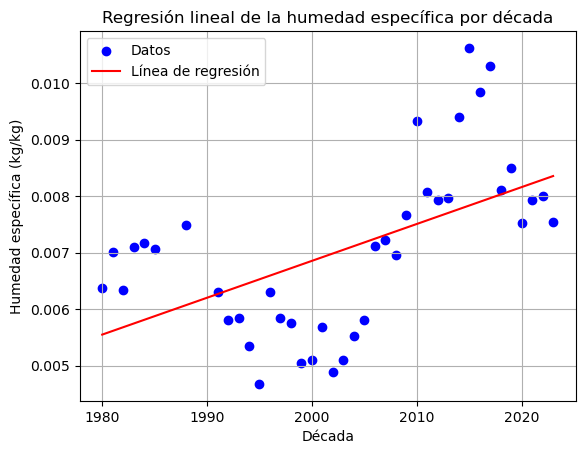

In [27]:
# Graficar los datos y la línea de regresión
plt.scatter(Tiempo, bulbohumedo, color='blue', label='Datos')
plt.plot(Tiempo, modelo.predict(X), color='red', label='Línea de regresión')
plt.xlabel('Década')
plt.ylabel('Humedad específica (kg/kg)')
plt.title('Regresión lineal de la humedad específica por década')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
pip install cmasher

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Import CMasher to register colormaps
import cmasher as cmr

In [30]:
coef=[]
coef2=[]
pvalue=[]
R2=[]
for i, ii in enumerate(esta1):
        #Haciendo la regresión lineal para una estación
    # Datos de ejemplo (concentración de un elemento químico y altura de las plantas)
    Tiempo = np.array(np.unique(data.SHmean[i].resample(time="YE").mean().dropna("time").time.dt.year))#Variable independiente
    bulbohumedo=np.array(data.SHmean[i].resample(time="YE").mean().dropna("time"))
    # Añadir una constante para el término de intersección en el modelo
    X = sm.add_constant(np.float64(Tiempo))
    # Ajustar el modelo de regresión lineal utilizando OLS (Mínimos cuadrados ordinarios)
    modelo = sm.OLS(bulbohumedo, X).fit()
    
    coef.append(modelo.params[0])
    coef2.append(modelo.params[1])
    pvalue.append(modelo.pvalues)
    R2.append(modelo.rsquared)
    

In [35]:
list=[coefT2,coef2,coefTW2,R2T,R2,R2TW]
p=["a)","b)", "c)"]
x=estafil["Lon"].astype(float)
y=estafil["Lat"].astype(float)
color=['cmr.pride','cmr.fusion_r']
fig = plt.figure(figsize=(10, 6))
n=0
for i,ii in enumerate(list):
    ax = fig.add_subplot(2, 3, n+1, projection=ccrs.Mercator())
    ax.set_global
    # fusion
    if n<3:
        ccmap=cmr.get_sub_cmap(color[0], 0.05, 0.95)
        
        c=np.array(ii)
        cs=ax.scatter(x=x,y=y,c=c,cmap=ccmap,marker='s', s=12,transform=ccrs.PlateCarree())
        cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.2,extend="both",shrink=0.8,pad=0.1)
        ax.coastlines()
        gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
        ax.xlabels_top = False# It should turn off the upper x ticks
        gl.top_labels = gl.right_labels = False
        ax.set_title(f"{p[n]}")
        cbar.ax.set_xlabel(r"$\beta_{1} [^\circC]$")
    else:
        ccmap=cmr.get_sub_cmap(color[1], 0.05, 0.95)
        
        c=np.array(ii)
        cs=ax.scatter(x=x,y=y,c=c,cmap=ccmap,marker='s', s=12,transform=ccrs.PlateCarree())
        cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.2,extend="both",shrink=0.8,pad=0.1)
        ax.coastlines()
        gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
        ax.xlabels_top = False# It should turn off the upper x ticks
        gl.top_labels = gl.right_labels = False
        cbar.ax.set_xlabel(r"$R^{2}$")
        
        
    n=n+1
        
        
    
    

#Gráfica de los coeficientes de los valores promedio
    
    
plt.tight_layout()
    
plt.savefig("Vmean.svg")    
    
    

ValueError: 
\beta_{1} [^\circC]
            ^
ParseSyntaxException: Expected {accent | symbol | function | operatorname | group | frac | dfrac | binom | genfrac | overset | underset | sqrt | overline}, found '\'  (at char 12), (line:1, col:13)

Error in callback <function _draw_all_if_interactive at 0x738949edb560> (for post_execute):


ValueError: 
\beta_{1} [^\circC]
            ^
ParseSyntaxException: Expected {accent | symbol | function | operatorname | group | frac | dfrac | binom | genfrac | overset | underset | sqrt | overline}, found '\'  (at char 12), (line:1, col:13)

ValueError: 
\beta_{1} [^\circC]
            ^
ParseSyntaxException: Expected {accent | symbol | function | operatorname | group | frac | dfrac | binom | genfrac | overset | underset | sqrt | overline}, found '\'  (at char 12), (line:1, col:13)

<Figure size 1000x600 with 12 Axes>

In [ ]:
print(np.max(np.array(coefT2)*10), np.min(np.array(coefT2)*10))

In [ ]:
np.array(coefTW2)*10

In [32]:
coefTW=[]
coefTW2=[]
pvalueTW=[]
R2TW=[]
for i, ii in enumerate(esta1):
        #Haciendo la regresión lineal para una estación
    # Datos de ejemplo (concentración de un elemento químico y altura de las plantas)
    Tiempo = np.array(np.unique(data.Twmean[i].resample(time="YE").mean().dropna("time").time.dt.year))#Variable independiente
    bulbohumedo=np.array(data.Twmean[i].resample(time="YE").mean().dropna("time"))
    # Añadir una constante para el término de intersección en el modelo
    X = sm.add_constant(np.float64(Tiempo))
    # Ajustar el modelo de regresión lineal utilizando OLS (Mínimos cuadrados ordinarios)
    modelo = sm.OLS(bulbohumedo, X).fit()
    coefTW.append(modelo.params[0])
    coefTW2.append(modelo.params[1])
    pvalueTW.append(modelo.pvalues)
    R2TW.append(modelo.rsquared)

In [33]:
coefT=[]
coefT2=[]
pvalueT=[]
R2T=[]
for i, ii in enumerate(esta1):
        #Haciendo la regresión lineal para una estación
    # Datos de ejemplo (concentración de un elemento químico y altura de las plantas)
    Tiempo = np.array(np.unique(data.Tmean[i].resample(time="YE").mean().dropna("time").time.dt.year))#Variable independiente
    bulbohumedo=np.array(data.Tmean[i].resample(time="YE").mean().dropna("time"))
    # Añadir una constante para el término de intersección en el modelo
    X = sm.add_constant(np.float64(Tiempo))
    # Ajustar el modelo de regresión lineal utilizando OLS (Mínimos cuadrados ordinarios)
    modelo = sm.OLS(bulbohumedo, X).fit()
    coefT.append(modelo.params[0])
    coefT2.append(modelo.params[1])
    pvalueT.append(modelo.pvalues)
    R2T.append(modelo.rsquared)

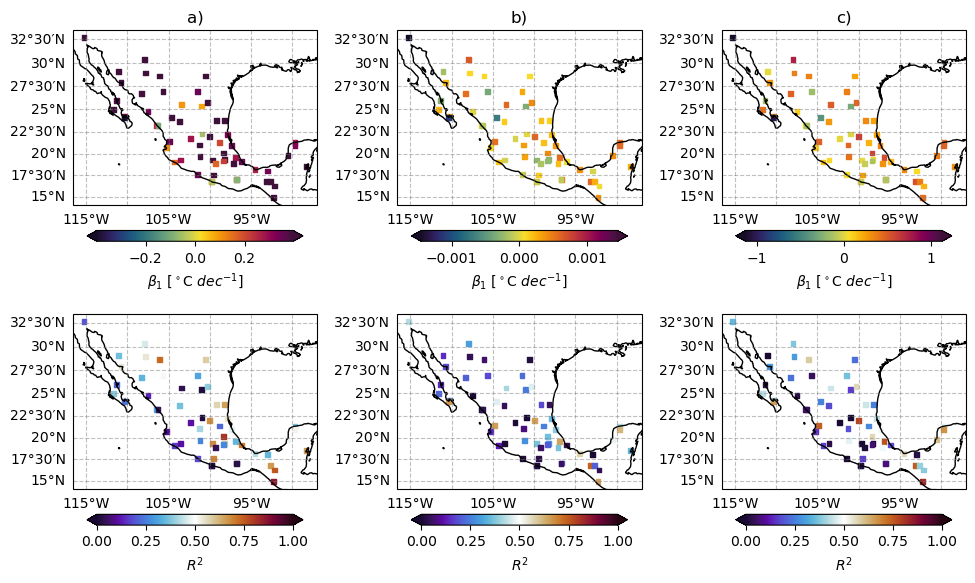

In [34]:
list=[coefT2,coef2,coefTW2,R2T,R2,R2TW]
p=["a)","b)", "c)"]
x=estafil["Lon"].astype(float)
y=estafil["Lat"].astype(float)
color=['cmr.pride','cmr.fusion_r']
fig = plt.figure(figsize=(10, 6))
n=0
for i,ii in enumerate(list):
    ax = fig.add_subplot(2, 3, n+1, projection=ccrs.Mercator())
    ax.set_global
    # fusion
    if n<3:
        ccmap=cmr.get_sub_cmap(color[0], 0, 0.95)
        
        c=np.array(ii)
        cs=ax.scatter(x=x,y=y,c=np.array(c)*10,cmap=ccmap,marker='s', s=12,transform=ccrs.PlateCarree(),vmin=np.min(np.array(c)*10), vmax=-np.min(np.array(c)*10))
        cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.2,extend="both",shrink=0.8,pad=0.1)
        ax.coastlines()
        gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
        ax.xlabels_top = False# It should turn off the upper x ticks
        gl.top_labels = gl.right_labels = False
        ax.set_title(f"{p[n]}")
        cbar.ax.set_xlabel(r"$\beta_{1}$ [$^\circ$C $dec^{-1}$]")
    else:
        ccmap=cmr.get_sub_cmap(color[1], 0, 1)
        
        c=np.array(ii)
        cs=ax.scatter(x=x,y=y,c=c,cmap=ccmap,marker='s', s=12,transform=ccrs.PlateCarree(),vmin=0, vmax=1)
        cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.2,extend="both",shrink=0.8,pad=0.1)
        ax.coastlines()
        gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
        ax.xlabels_top = False# It should turn off the upper x ticks
        gl.top_labels = gl.right_labels = False
        cbar.ax.set_xlabel(r"$R^{2}$")
        
        
    n=n+1
        
        
    
    

#Gráfica de los coeficientes de los valores promedio
    
    
plt.tight_layout()
    
plt.savefig("Vmean.svg")    
    

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
# set_extent([lonmin,lonmax,latmin,latmax])
#ax.set_extent([-120, -90, 14, 33], crs=ccrs.PlateCarree()) #siempre tiene que llevar esto para un recorte
ax.set_global
# fusion
ccmap=cmr.get_sub_cmap('cmr.pride', 0.05, 0.95)
x=estafil["Lon"].astype(float)
y=estafil["Lat"].astype(float)
c=np.array(R2)
cs=ax.scatter(x=x,y=y,c=c,cmap=ccmap,marker='s', transform=ccrs.PlateCarree())
cbar=plt.colorbar(cs,orientation='vertical',fraction=0.1,extend="both",shrink=1)
ax.coastlines()
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
ax.xlabels_top = False# It should turn off the upper x ticks
gl.top_labels = gl.right_labels = False

ax.set_title("R2 de regresión lineal por estación para SHmean")
plt.savefig("Twmax.jpg")
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
# set_extent([lonmin,lonmax,latmin,latmax])
#ax.set_extent([-120, -90, 14, 33], crs=ccrs.PlateCarree()) #siempre tiene que llevar esto para un recorte
ax.set_global
# fusion
ccmap=cmr.get_sub_cmap('cmr.pride', 0.05, 0.95)
x=estafil["Lon"].astype(float)
y=estafil["Lat"].astype(float)
c=np.array(coefT2)
cs=ax.scatter(x=x,y=y,c=c,cmap=ccmap,marker='s', transform=ccrs.PlateCarree())
cbar=plt.colorbar(cs,orientation='vertical',fraction=0.1,extend="both",shrink=0.8)
ax.coastlines()
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
ax.xlabels_top = False# It should turn off the upper x ticks
gl.top_labels = gl.right_labels = False

ax.set_title("Coeficiente B1 de regresión lineal por estación (pendiente para la temperatura)")
plt.savefig("Twmax.jpg")
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
# set_extent([lonmin,lonmax,latmin,latmax])
#ax.set_extent([-120, -90, 14, 33], crs=ccrs.PlateCarree()) #siempre tiene que llevar esto para un recorte
ax.set_global
# fusion
ccmap=cmr.get_sub_cmap('cmr.pride', 0.05, 0.95)
x=estafil["Lon"].astype(float)
y=estafil["Lat"].astype(float)
c=np.array(R2T)
cs=ax.scatter(x=x,y=y,c=c,cmap=ccmap,marker='s', transform=ccrs.PlateCarree())
cbar=plt.colorbar(cs,orientation='vertical',fraction=0.1,extend="both",shrink=0.8)
ax.coastlines()
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
ax.xlabels_top = False# It should turn off the upper x ticks
gl.top_labels = gl.right_labels = False

ax.set_title("R2 de regresión lineal por estación para Tmean")
plt.savefig("Twmax.jpg")
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
# set_extent([lonmin,lonmax,latmin,latmax])
#ax.set_extent([-120, -90, 14, 33], crs=ccrs.PlateCarree()) #siempre tiene que llevar esto para un recorte
ax.set_global
# fusion
ccmap=cmr.get_sub_cmap('cmr.fusion_r', 0.05, 0.95)
x=estafil["Lon"].astype(float)
y=estafil["Lat"].astype(float)
# cambiamos a unidades de degC decada-1
c=np.array(coefTW2)*10
cs=ax.scatter(x=x,y=y,c=c,cmap=ccmap,marker='s',vmin=-1,vmax=1, transform=ccrs.PlateCarree())
cbar=plt.colorbar(cs,orientation='vertical',fraction=0.1,extend="both",shrink=0.8)
ax.coastlines()
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
ax.xlabels_top = False# It should turn off the upper x ticks
gl.top_labels = gl.right_labels = False

ax.set_title("Coeficiente B1 de regresión lineal por estación (pendiente) para TW")
plt.savefig("Twmax.jpg")
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
# set_extent([lonmin,lonmax,latmin,latmax])
#ax.set_extent([-120, -90, 14, 33], crs=ccrs.PlateCarree()) #siempre tiene que llevar esto para un recorte
ax.set_global
# fusion
ccmap=cmr.get_sub_cmap('cmr.pride', 0.05, 0.95)
x=estafil["Lon"].astype(float)
y=estafil["Lat"].astype(float)
c=np.array(R2TW)
cs=ax.scatter(x=x,y=y,c=c,cmap=ccmap,marker='s', transform=ccrs.PlateCarree())
cbar=plt.colorbar(cs,orientation='vertical',fraction=0.1,extend="both",shrink=0.8)
ax.coastlines()
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
ax.xlabels_top = False# It should turn off the upper x ticks
gl.top_labels = gl.right_labels = False

ax.set_title("R2 de regresión lineal por estación para TW")
plt.savefig("Twmax.jpg")
plt.show()

In [ ]:
estafil['m']=np.array(coef2)
estafil

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
# set_extent([lonmin,lonmax,latmin,latmax])
#ax.set_extent([-120, -90, 14, 33], crs=ccrs.PlateCarree()) #siempre tiene que llevar esto para un recorte
ax.set_global
# fusion
ccmap=cmr.get_sub_cmap('cmr.pride', 0.05, 0.95)
x=estafil["Lon"].astype(float)
y=estafil["Lat"].astype(float)
c=np.array(coef2)
cs=ax.scatter(x=x,y=y,c=c,cmap=ccmap,marker='s', transform=ccrs.PlateCarree())
cbar=plt.colorbar(cs,orientation='vertical',fraction=0.1,extend="both",shrink=0.8)
ax.coastlines()
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
ax.xlabels_top = False# It should turn off the upper x ticks
gl.top_labels = gl.right_labels = False

ax.set_title("Coeficiente B1 de regresión lineal por estación (pendiente)")
plt.savefig("Twmax.jpg")
plt.show()

In [ ]:
# normalizamos los datos por el valor maximo
maxi2=bulbohumedo.max()
B1=bulbohumedo/maxi2

In [ ]:
df=pd.DataFrame()
df["Value"]=B1
df["Year"]=np.unique(Tiempo)

In [ ]:
df

In [ ]:
#Definir el modelo 
model1 = smf.logit('Value ~ Year', data=df)
#Ajustar el modelo
fit2 = model1.fit()

In [ ]:
#Acceder a los coeficientes de regresión con ._results.params
b01=fit2._results.params[0]
b11=fit2._results.params[1]

In [ ]:
b11

In [ ]:
#Calculo de predicciones sin disfraz
yhat2=np.max(df.Value)/(1+np.exp(-(b01+b11*df.Year)))

In [ ]:
# grafica con regresion 
plt.plot(df.Year,np.squeeze(yhat2),c='m',linewidth=2.2,linestyle='--')
plt.scatter(df.Year,df.Value,color='teal', linewidth=3, s=90, facecolor='none', label='Datos')
#grafico_linea_ts(1958,2023,'Año ','Población [millones]','Brasil',ymin=None,ymax=None,legend=False)